# WeatherPy
----

### Analysis
* Temperature is warmer around the equater with warmer temperatures extending 20 degrees north and south of the equator. Interestingly, inverse sections of the southern hemisphere and northern hemisphere (i.e., -20º and 20º) show generally lower temperatures in the north. More research would be needed to explain why that is.
* There doesn't seem to be a strong relationship between latitude and humidity, however there do appear to be more recorded observations in the north than the south.
* There are straight bands plotted out for cloudiness against latitude. It is difficult to believe that this is a naturally occuring phenomenon, and it does raise question as to the methods used to estimate cloudiness. More research would be needed to understand why records graph so tightly to gridlines.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

cities_df = pd.DataFrame({"City":cities})
cities_df["Cloudiness"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df["Humidity"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Wind Speed"] = ""

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,,,,,,,,
1,mahebourg,,,,,,,,
2,santa margherita ligure,,,,,,,,
3,port elizabeth,,,,,,,,
4,hamilton,,,,,,,,


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

for index, row in cities_df.iterrows():
    current_city = row["City"]
    print(f"Processing Record {index} of {len(cities_df)} | {current_city}")
    response = requests.get(query_url + current_city).json()
    time.sleep(1)
    try:
            cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
            cities_df.loc[index, "Country"] = response['sys']['country']
            cities_df.loc[index, "Date"] = response['dt']
            cities_df.loc[index, "Humidity"] = response['main']['humidity']
            cities_df.loc[index, "Lat"] = response['coord']['lat']
            cities_df.loc[index, "Lng"] = response['coord']['lon']
            cities_df.loc[index, "Max Temp"] = response['main']['temp_max']
            cities_df.loc[index, "Wind Speed"] = response['wind']['speed']
            
    except:
          print("City not found. Skipping...")
    

cities_df.head()

Beginning Data Retrieval
-----------------------------
Processing Record 0 of 618 | ushuaia
Processing Record 1 of 618 | mahebourg
Processing Record 2 of 618 | santa margherita ligure
Processing Record 3 of 618 | port elizabeth
Processing Record 4 of 618 | hamilton
Processing Record 5 of 618 | nelson bay
Processing Record 6 of 618 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of 618 | broken hill
Processing Record 8 of 618 | nikolskoye
Processing Record 9 of 618 | maamba
Processing Record 10 of 618 | caravelas
Processing Record 11 of 618 | sinnamary
Processing Record 12 of 618 | mataura
Processing Record 13 of 618 | bethel
Processing Record 14 of 618 | sao filipe
Processing Record 15 of 618 | atuona
Processing Record 16 of 618 | torbay
Processing Record 17 of 618 | baruun-urt
Processing Record 18 of 618 | kosa
Processing Record 19 of 618 | hermanus
Processing Record 20 of 618 | saldanha
Processing Record 21 of 618 | new norfolk
Processing Record 22 of 618 | sorland

Processing Record 196 of 618 | calabozo
Processing Record 197 of 618 | ostrovnoy
Processing Record 198 of 618 | hay river
Processing Record 199 of 618 | stolin
Processing Record 200 of 618 | longyearbyen
Processing Record 201 of 618 | maghama
City not found. Skipping...
Processing Record 202 of 618 | ust-nera
Processing Record 203 of 618 | san luis
Processing Record 204 of 618 | tura
Processing Record 205 of 618 | georgetown
Processing Record 206 of 618 | beringovskiy
Processing Record 207 of 618 | tual
Processing Record 208 of 618 | alice springs
Processing Record 209 of 618 | meulaboh
Processing Record 210 of 618 | cairns
Processing Record 211 of 618 | mandera
Processing Record 212 of 618 | flinders
Processing Record 213 of 618 | sayyan
Processing Record 214 of 618 | faya
Processing Record 215 of 618 | krasnoselkup
City not found. Skipping...
Processing Record 216 of 618 | dalbandin
Processing Record 217 of 618 | gat
Processing Record 218 of 618 | saleaula
City not found. Skipping...

Processing Record 384 of 618 | ugoofaaru
Processing Record 385 of 618 | port said
Processing Record 386 of 618 | limpapa
Processing Record 387 of 618 | alofi
Processing Record 388 of 618 | placerville
Processing Record 389 of 618 | leirvik
Processing Record 390 of 618 | ongandjera
Processing Record 391 of 618 | payson
Processing Record 392 of 618 | itaituba
Processing Record 393 of 618 | alotau
City not found. Skipping...
Processing Record 394 of 618 | pangnirtung
Processing Record 395 of 618 | hualmay
Processing Record 396 of 618 | moron
Processing Record 397 of 618 | craig
Processing Record 398 of 618 | yakuplu
Processing Record 399 of 618 | bonoua
Processing Record 400 of 618 | nhulunbuy
Processing Record 401 of 618 | arraial do cabo
Processing Record 402 of 618 | valera
Processing Record 403 of 618 | konstantinovsk
Processing Record 404 of 618 | yangjiang
Processing Record 405 of 618 | tumannyy
City not found. Skipping...
Processing Record 406 of 618 | geraldton
Processing Record 4

Processing Record 576 of 618 | namatanai
Processing Record 577 of 618 | moissala
Processing Record 578 of 618 | mahanoro
Processing Record 579 of 618 | san andres
Processing Record 580 of 618 | vorobyevka
Processing Record 581 of 618 | gualeguaychu
Processing Record 582 of 618 | alta floresta
Processing Record 583 of 618 | concordia
Processing Record 584 of 618 | kazanka
Processing Record 585 of 618 | bairiki
City not found. Skipping...
Processing Record 586 of 618 | aksarka
Processing Record 587 of 618 | tumsar
Processing Record 588 of 618 | richards bay
Processing Record 589 of 618 | vadso
Processing Record 590 of 618 | egvekinot
Processing Record 591 of 618 | prince rupert
Processing Record 592 of 618 | labuan
Processing Record 593 of 618 | vestmanna
Processing Record 594 of 618 | constitucion
Processing Record 595 of 618 | lorengau
Processing Record 596 of 618 | birjand
Processing Record 597 of 618 | herat
Processing Record 598 of 618 | nabire
Processing Record 599 of 618 | tanshui

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90,AR,1538175600,86,-54.81,-68.31,37.4,21.92
1,mahebourg,40,MU,1538175600,73,-20.41,57.7,71.6,10.29
2,santa margherita ligure,0,IT,1538175000,63,44.33,9.21,66.2,6.93
3,port elizabeth,1,US,1538175360,93,39.31,-74.98,66.92,4.38
4,hamilton,20,BM,1538171700,65,32.3,-64.78,78.8,3.36


In [13]:
cities_df.replace('',np.nan, inplace = True)

cleaned_cities = cities_df[cities_df["Country"].notnull()]

cleaned_cities.to_csv(output_data_file)

cleaned_cities.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ushuaia,90.0,AR,1.538176e+09,86.0,-54.81,-68.31,37.40,21.92
1,mahebourg,40.0,MU,1.538176e+09,73.0,-20.41,57.70,71.60,10.29
2,santa margherita ligure,0.0,IT,1.538175e+09,63.0,44.33,9.21,66.20,6.93
3,port elizabeth,1.0,US,1.538175e+09,93.0,39.31,-74.98,66.92,4.38
4,hamilton,20.0,BM,1.538172e+09,65.0,32.30,-64.78,78.80,3.36


#### Latitude vs. Temperature Plot

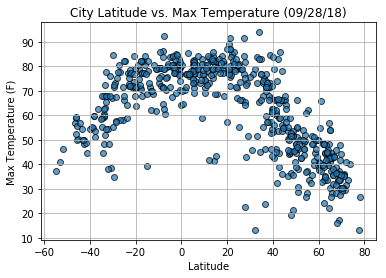

In [48]:
figa, ax = plt.subplots()
ax.scatter(cleaned_cities["Lat"],cleaned_cities["Max Temp"], alpha = 0.7, edgecolors = "black")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("City Latitude vs. Max Temperature (09/28/18)")
ax.grid(True)
plt.savefig("output_data/templat.png")

#### Latitude vs. Humidity Plot

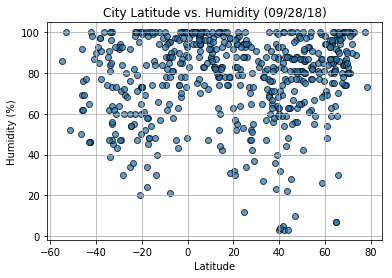

In [49]:
figb, humlat = plt.subplots()
humlat.scatter(cleaned_cities["Lat"],cleaned_cities["Humidity"], alpha = 0.7, edgecolors = "black")
humlat.set_xlabel("Latitude")
humlat.set_ylabel("Humidity (%)")
humlat.set_title("City Latitude vs. Humidity (09/28/18)")
humlat.grid(True)
plt.savefig("output_data/humlat.png")

#### Latitude vs. Cloudiness Plot

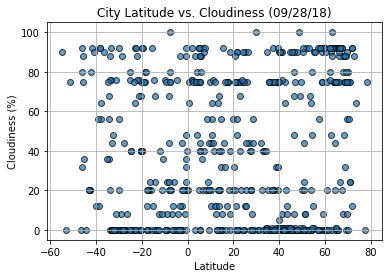

In [50]:
figc, clolat = plt.subplots()
clolat.scatter(cleaned_cities["Lat"],cleaned_cities["Cloudiness"], alpha = 0.7, edgecolors = "black")
clolat.set_xlabel("Latitude")
clolat.set_ylabel("Cloudiness (%)")
clolat.set_title("City Latitude vs. Cloudiness (09/28/18)")
clolat.grid(True)
plt.savefig("output_data/clolat.png")

#### Latitude vs. Wind Speed Plot

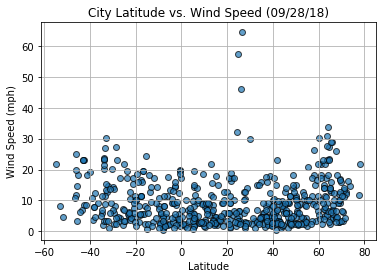

In [51]:
figd, winlat = plt.subplots()
winlat.scatter(cleaned_cities["Lat"],cleaned_cities["Wind Speed"], alpha = 0.7, edgecolors = "black")
winlat.set_xlabel("Latitude")
winlat.set_ylabel("Wind Speed (mph)")
winlat.set_title("City Latitude vs. Wind Speed (09/28/18)")
winlat.grid(True)
plt.savefig("output_data/winlat.png")